# Some quantum math

We will start our homework with the introduction of the operator of interes $P$. This operator is equivalent to the following graph:

| Source | Destination | Weight |
|---|---|---|
| 0 | 1 | 1 |
| 1 | 3 | -1 |
| 3 | 2 | i|
| 2 | 0 | -i|

Your task is to provide an analysis of the operator's matrix: 
- obtain it's eigenvalues and 
- eigenvectors 
given a quantum computer. 

## Matrix construction and properties

For the reference I already solved the same problem using a classical computer.

In [1]:
import numpy as np
import cmath
from fractions import Fraction


np.set_printoptions(precision=3, suppress=True)


P = np.zeros((4, 4), dtype=np.complex128)
P[1, 0] = 1.
P[3, 1] = -1.
P[2, 3] = 1j
P[0, 2] = -1j

e_values, e_vectors = np.linalg.eig(P)

for va, ve in zip(e_values, e_vectors.T):
    print(f"eigenvalue:  {va.real:4f} + ({va.imag:4f})*j")
    # %2 is used to obtain positive phases only
    frac = Fraction(cmath.phase(va) / (2 * np.pi) % 1).limit_denominator(12)
    print(f"eigenphase: {frac}*π")
    print(f"eigenvector: {ve}")
    print()

eigenvalue:  -0.707107 + (0.707107)*j
eigenphase: 3/8*π
eigenvector: [-0.354+0.354j  0.5  -0.j     0.5  +0.j     0.354+0.354j]

eigenvalue:  -0.707107 + (-0.707107)*j
eigenphase: 5/8*π
eigenvector: [ 0.354+0.354j -0.5  +0.j     0.5  +0.j    -0.354+0.354j]

eigenvalue:  0.707107 + (0.707107)*j
eigenphase: 1/8*π
eigenvector: [-0.354-0.354j -0.5  +0.j     0.5  +0.j     0.354-0.354j]

eigenvalue:  0.707107 + (-0.707107)*j
eigenphase: 7/8*π
eigenvector: [ 0.354-0.354j  0.5  +0.j     0.5  -0.j    -0.354-0.354j]



### This is additional reading
These two articles inspired me for the lab.

- https://en.wikipedia.org/wiki/Ritz_method
- https://qiskit.org/textbook/ch-labs/Lab02_QuantumMeasurement.html

What you do here is different, but the schema is the same. Ritz method states that **minimal** energy of the Hamiltonian (Hermitian!) is obtained at the in the eigenstate of this Hamiltonian.

Our hypothesis is similar, but DIFFERENT: the **maximum** of the operator (Unitary) is obtained at the eigenstate of the operator.

## Obtaining eigenvector: hybrid algorithm

Let us all understand the idea.

We know, that $|\langle \psi | \psi \rangle|^2$ is equal to 1. This formula is equivalent to the circuit, performing initialization of the state, and then - inverse procedure:

$1 = \large |\langle 0 | init^{\dagger}_{\psi} \times init_{\psi}| 0\rangle|^2 = ...$.

Due to the linearity of the system, the phase coefficient should not change the norm:

$\large ... = |e^{i\phi}\langle 0 | init^{\dagger}_{\psi} \times init_{\psi}| 0\rangle|^2 = |\langle 0 | init^{\dagger}_{\psi} \times e^{i\phi} \times init_{\psi}| 0\rangle|^2$.

If $|\psi\rangle$ is an eigenvector of some operator $U$, than this statement is also true:

$\large |\langle 0 | init^{\dagger}_{\psi} \times U \times init_{\psi}| 0\rangle|^2 = 1$

_One can also notice, that this problem is equivalent to computation of `fidelity` between $ |\psi\rangle$ and $ U|\psi\rangle$._


for this formula $|\langle \psi|U|\psi\rangle|^2$ the value is maximized (and equals to 1) if and only if $|\psi\rangle$ is an **eigenvector** of $U$. Thus, given a matrix, we will search for $|\psi\rangle$ which is an eigenvector.

Your soluting is a hybrid method.

**Quantum part**:

You will construct an algorithm which will evaluate a fidelity of the guessed state. IRL you cannot observe the vector. So, we construct the circuit of the following form.

1. Your code should be wrapped into a function `loss(x: list) -> float`.
2. First initialize the state $init_{\psi}$
3. Apply operator of interest $U$.
4. Undo initialization computations $init^{\dagger}_{\psi}$.
5. Measure. Measurement in state $|0\rangle$ corresponds the fact, that $U$ makes no change (except maybe the phase) to $\psi$. Report probability of $|0\rangle$ as the result of the function.

**Classical part**:

1. Apply optimization method for the function `loss(x)` trying to minimize it's value. We will use [`optimize` module from scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).


__Important comment__

We search for $\psi$, which is (in our case) a 4-dimensional complex vector. This gives us 8 degrees of freedom for optimization, which is huuuge. Indeed, we have less (e.g, remove global phase, or consider norming constraint). So, we will prepare an ["*ansatz*"](https://en.wikipedia.org/wiki/Ansatz) -- a parametrized guess of the $\psi$, a circiut which prepares a state given some real-values parameters. You may changed the proposed ansatz, but you don't have to.


## So let us compose things together

Here are constants, and the method which prepares ansatz for you.

In [2]:
# constants and pre-definitions
from qiskit import BasicAer, QuantumCircuit, execute

backend = BasicAer.get_backend('qasm_simulator')
SHOTS = 10000
PARAMS_COUNT = 5

def _ansatz(theta):
    circuit = QuantumCircuit(2)  
    circuit.ry(theta[0], 0)
    circuit.ry(theta[1], 1)
    circuit.crx(theta[2], 0, 1)
    circuit.rz(theta[3], 0)
    circuit.rz(theta[4], 1)
    return circuit

### Computing fidelity.

Complete the method, which computes fidelity between $|ansatz\rangle$ and $U|ansatz\rangle$. Refer to the [definition of fidelity](https://en.wikipedia.org/wiki/Fidelity_of_quantum_states) if needed.

In [3]:
def compute_fidelity(theta, operator):
    qc = QuantumCircuit(2)
    
    # your system starts in |0>
    # 1. now you need to initialize the guess of PSI
    # TODO - your code here 
    # [10] points
    
    
    # 2. Then you run the operator of your interest
    # TODO - your code here
    # [10] points

    # 3. Undo operations for state preparation
    # TODO - your code here
    # [10] points
    
    
    qc.measure_all()   
    counts = execute(qc, backend, shots=SHOTS).result().get_counts()
    
    # 4. compute the fidelity estimation.
    # TODO - your code here
    # [20] points
    fidelity = ...
    return fidelity
    

def loss(theta):
    ''' Loss function will be minimized for operator P 
    '''
    return 1. - compute_fidelity(theta, P)
    

# usage exasample
compute_fidelity(theta=[1, -1, 1, -1, 0.5], operator=P)

0.2763

### Let's apply the method and print results

Even if variational methods utilitize iterative optimization tools (like gradient descent), the probabilistic nature of the measurement may lead to a very bad convergence. Still, you may try them by changing `shgo` (global) to `minimize` call.

We will launch hybrid algorithm 3 times to obtain the best approximation.

/Users/sprotasov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


     fun: 0.1804
    funl: array([0.18 , 0.195, 0.326, 0.439])
 message: 'Optimization terminated successfully.'
    nfev: 151
     nit: 2
   nlfev: 51
   nlhev: 0
   nljev: 5
 success: True
       x: array([-1.583, -1.36 ,  1.237, -1.197,  1.706])
      xl: array([[-1.583, -1.36 ,  1.237, -1.197,  1.706],
       [-1.195,  1.435,  1.637,  2.646,  2.545],
       [-2.176, -2.289, -1.379,  3.13 , -1.453],
       [-1.049,  1.223, -2.921, -1.524, -0.366]])
Achieved fidelity: 0.8247
Ansatz circuit:


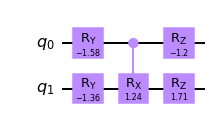

Statevector (almost eigevector) [ 0.529-0.138j -0.311+0.417j -0.053-0.439j  0.272+0.402j]
     fun: 0.348
    funl: array([0.348, 0.381, 0.516])
 message: 'Optimization terminated successfully.'
    nfev: 214
     nit: 2
   nlfev: 114
   nlhev: 0
   nljev: 9
 success: True
       x: array([-2.366,  1.534, -2.269,  1.52 ,  2.71 ])
      xl: array([[-2.366,  1.534, -2.269,  1.52 ,  2.71 ],
       [-1.256, -1.098, -0.297, -1.433,  2.22 ],
       [ 2.655,  1.358,  0.452,  2.157, -0.971]])
Achieved fidelity: 0.6564
Ansatz circuit:


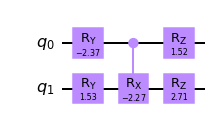

Statevector (almost eigevector) [-0.141-0.233j -0.56 -0.324j  0.217+0.147j  0.657+0.081j]


/Users/sprotasov/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


     fun: 0.10029999999999994
    funl: array([0.1])
 message: 'Optimization terminated successfully.'
    nfev: 154
     nit: 2
   nlfev: 54
   nlhev: 0
   nljev: 4
 success: True
       x: array([-1.562, -1.216,  0.206, -0.608,  2.438])
      xl: array([[-1.562, -1.216,  0.206, -0.608,  2.438]])
Achieved fidelity: 0.8953
Ansatz circuit:


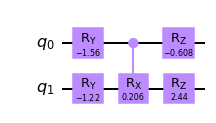

Statevector (almost eigevector) [ 0.356-0.462j -0.069+0.572j -0.019-0.405j  0.197+0.353j]


In [4]:
from scipy.optimize import minimize, shgo
from math import pi

best_vector = None
best_fidelity = -1.

for i in range(3):
    # this is the main part of the code
    global_minimum = shgo(
            loss, 
            [(-pi, pi)] * PARAMS_COUNT, 
            sampling_method='halton')
    print(global_minimum)
    
    
    # here is some visualization
    fid = compute_fidelity(global_minimum.x, P)
    print(f"Achieved fidelity: {fid}")
    
    print("Ansatz circuit:")
    qc = QuantumCircuit(2)
    qc.append(_ansatz(global_minimum.x), [0, 1])
    display(qc.decompose().draw('mpl'))
    
    sv = execute(qc, 
                 BasicAer.get_backend('statevector_simulator')
                ).result().get_statevector()
    if best_fidelity < compute_fidelity(global_minimum.x, P):
        best_fidelity = fid
        best_vector = sv
        
    print("Statevector (almost eigevector)", sv)

### Compare your vector with the precomputed ones.

In [5]:
from qiskit.quantum_info import Statevector

for val, vec in zip(e_values, e_vectors.T):
    from qiskit.quantum_info import state_fidelity, Statevector
    
    fi = state_fidelity(best_vector, Statevector(vec))
    print(f"Fidelity is: {fi:.4f}; corresponding eigenphase: {cmath.phase(val)}")

Fidelity is: 0.0502; corresponding eigenphase: 2.356194490192345
Fidelity is: 0.9471; corresponding eigenphase: -2.356194490192345
Fidelity is: 0.0001; corresponding eigenphase: 0.7853981633974485
Fidelity is: 0.0026; corresponding eigenphase: -0.7853981633974483


## QPE: quantum phase estimation

QPE is an algorithm which estimates phase value (in shares of full circle). Apply it to obtain the value of the eigenphase and eigenvalue.

In [ ]:
from qiskit.circuit.library import PhaseEstimation
from qiskit.extensions import UnitaryGate

PRECISION = 4

qc = QuantumCircuit(PRECISION + 2, PRECISION)

# TODO: implemend a QPE circuit for `best_vector` vector.
# [30] points

qc.draw('mpl', scale=.5)

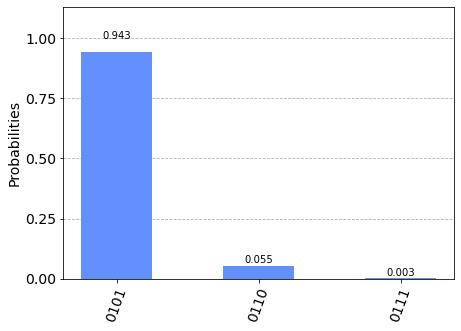

In [7]:
counts = execute(qc, backend, shots=10000).result().get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [8]:
# TODO print the correct extimation of the eigenphase 
# given the results of measurement
# write your code here
# [20] points

5/8*π
